In [61]:
import xdm_toolkit.xdm_plot as xplot
import xdm_toolkit.xdm_io as xdm_io
import matplotlib.pyplot as plt
import xdm_toolkit.peak_io.file_format as fm
import matplotlib.pyplot as plt
import numpy as np

In [42]:
import xdm_toolkit.peak_utils as pu
reload(pu)

reload(fm)
input_dir = '/Users/sfli/Consult/Spear_2017/Data/Jake/Mg/Reduced/z42'
reader = fm.I9PeakReader()
peak_list = reader.load_files(input_dir, 'Mg_z42_', 6, [120, 125], 2)
#peak_list_all = reader.load_dir(input_dir, 2)
# pu.plot_peaks(peak_list[0], 'r.')
# plt.gca().invert_yaxis()


It seems weird that there are not too many different spots... Either the reduction paramters are not right, or something is wrong. Need to compare against raw images.

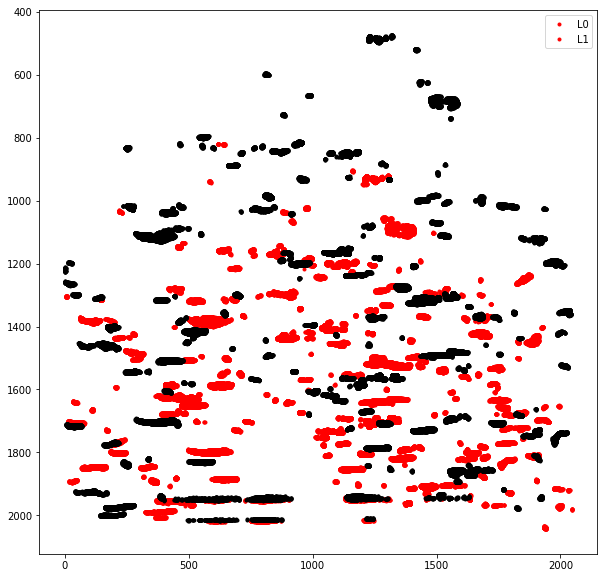

In [45]:
import xdm_toolkit.peak_utils as pu
import matplotlib.pyplot as plt
reload(pu)

f = plt.figure(figsize=(10, 10))
pu.plot_peaks(peak_list[0], 'r.', f)
pu.plot_peaks(peak_list[1], 'k.', f)
plt.legend(['L0', 'L1'])
plt.gca().invert_yaxis() 
plt.show(block=False)

In [27]:
# Generate reduced data files.

import numpy as np

start = 0
n_per_L = 720
for z in xrange(46):
    for L in xrange(2):
        print str(z) + ' ' + str(L) + ' ' + str(start)
        start += n_per_L

#     print str(z) + ' ' + str(1) + ' ' + str(stop)


0 0 0
0 1 720
1 0 1440
1 1 2160
2 0 2880
2 1 3600
3 0 4320
3 1 5040
4 0 5760
4 1 6480
5 0 7200
5 1 7920
6 0 8640
6 1 9360
7 0 10080
7 1 10800
8 0 11520
8 1 12240
9 0 12960
9 1 13680
10 0 14400
10 1 15120
11 0 15840
11 1 16560
12 0 17280
12 1 18000
13 0 18720
13 1 19440
14 0 20160
14 1 20880
15 0 21600
15 1 22320
16 0 23040
16 1 23760
17 0 24480
17 1 25200
18 0 25920
18 1 26640
19 0 27360
19 1 28080
20 0 28800
20 1 29520
21 0 30240
21 1 30960
22 0 31680
22 1 32400
23 0 33120
23 1 33840
24 0 34560
24 1 35280
25 0 36000
25 1 36720
26 0 37440
26 1 38160
27 0 38880
27 1 39600
28 0 40320
28 1 41040
29 0 41760
29 1 42480
30 0 43200
30 1 43920
31 0 44640
31 1 45360
32 0 46080
32 1 46800
33 0 47520
33 1 48240
34 0 48960
34 1 49680
35 0 50400
35 1 51120
36 0 51840
36 1 52560
37 0 53280
37 1 54000
38 0 54720
38 1 55440
39 0 56160
39 1 56880
40 0 57600
40 1 58320
41 0 59040
41 1 59760
42 0 60480
42 1 61200
43 0 61920
43 1 62640
44 0 63360
44 1 64080
45 0 64800
45 1 65520


In [2]:
import xdm_toolkit.xdm_plot as xplot
import xdm_toolkit.xdm_io as xdm_io
import matplotlib.pyplot as plt
mg_path = '/Users/sfli/Consult/Spear_2017/Reconstruction/Mg/z23/Mg_z23.mic.LBFS'
snp, sw = xdm_io.load_mic(mg_path)

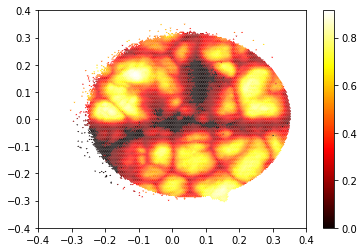

(21228, 19)

In [5]:
reload(xplot)
fig, ax, im = xplot.plot_mic(snp, sw, 2, 0)
# Show the actual plot
plt.axis([-0.4, 0.4, -0.4, 0.4])
plt.show(block=False)

Initial fit of layer 23 (z23). Here, we're only showing the confidence map. Note that the reconstruction is not completed yet; hence we see the "salt and pepper" noise. We see two "cuts" of dark, low confidence region. Not entirely sure if this is physical, but it's something worth nothing. Possible explainations: 1. defect due to damage, 2. twin regions fitting poorly due to suboptimal parameters. 


Next Steps:

1. Isolate a few compact grains to be used for parameter optimization.
2. Construct the batch script to perform reconstructions across the data set. 

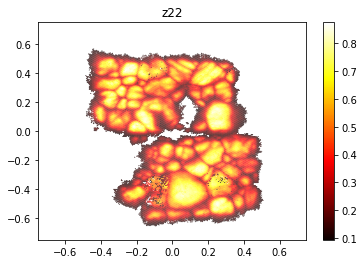

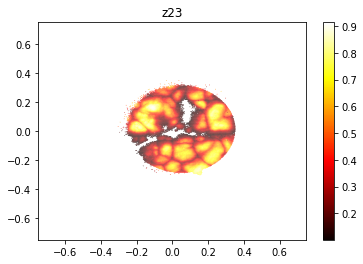

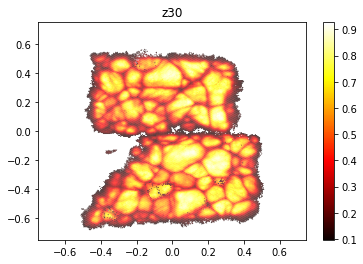

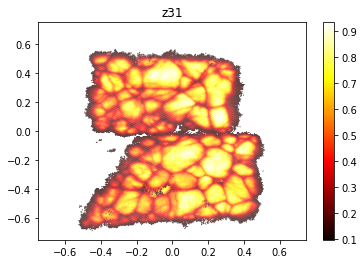

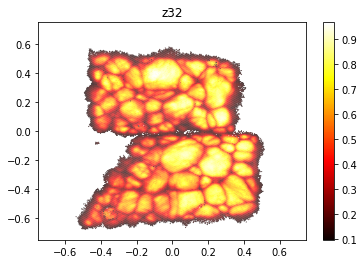

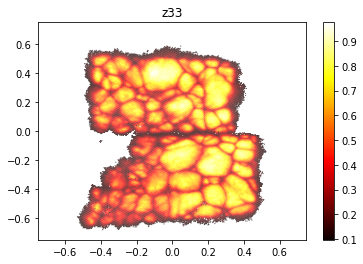

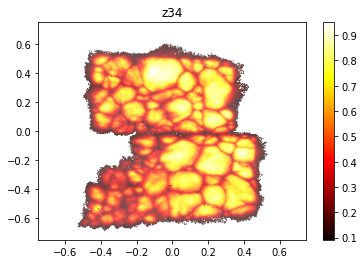

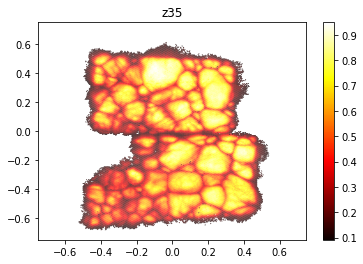

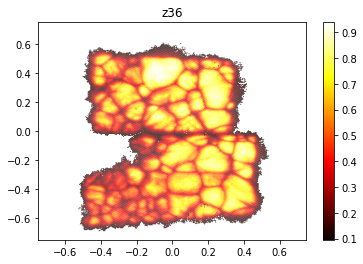

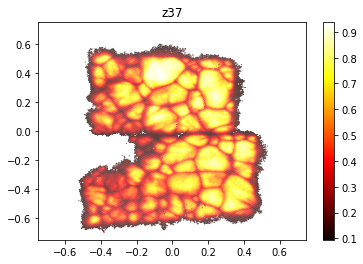

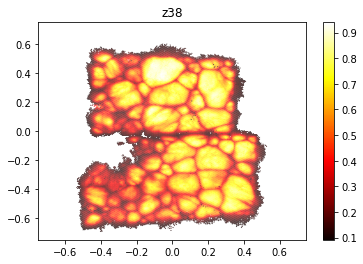

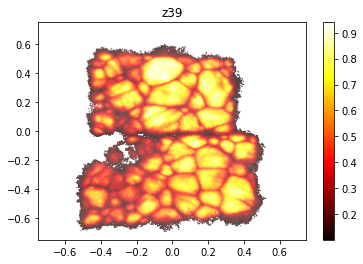

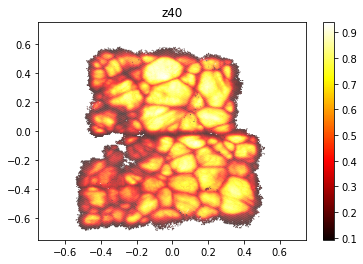

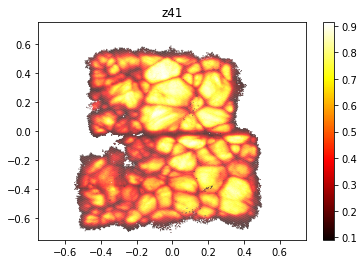

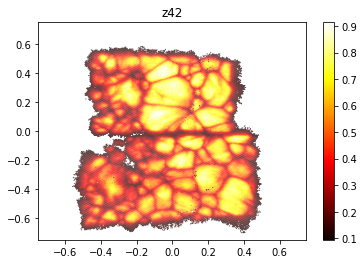

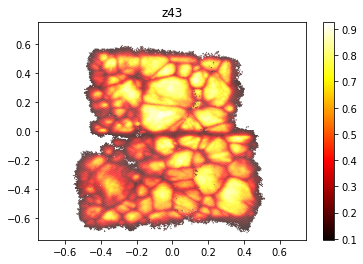

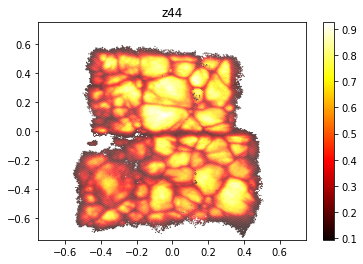

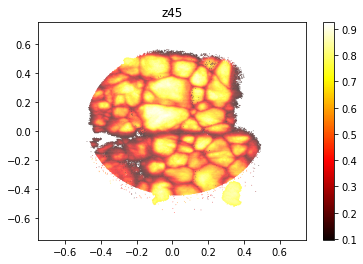

In [ ]:
import xdm_toolkit.xdm_plot as xplot
import xdm_toolkit.xdm_io as xdm_io
import matplotlib.pyplot as plt

num = [22, 23, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


for n in num:
    path = '/Users/sfli/Consult/Spear_2017/Reconstruction/Mg/Result/Mg_z{0}.mic.LBFS'.format(str(n))
    snp, sw = xdm_io.load_mic(path)
    fig, ax, im = xplot.plot_mic(snp, sw, 2, 0)
    plt.axis([-0.75, 0.75, -0.75, 0.75])
    plt.title('z{0}'.format(str(n)))
    plt.show(block=False)


Initial fit (confidence map) of z35 and z45. It takes 1024 cores 8276 and 9210 seconds. Max discrete candidate of 90 and acceleration ratio of 0.75. I should have realized that the same is much larger than 1mm. Need to recenter the fitting volume.

Need to try a 1.2mm x 1.2mm to see if that works.

[Oct 5] Using a larger fit volume, we see that z40 is mapped completely. The shape and dimensions of z40 resembles the shape of the tomographic reconstruction (below).

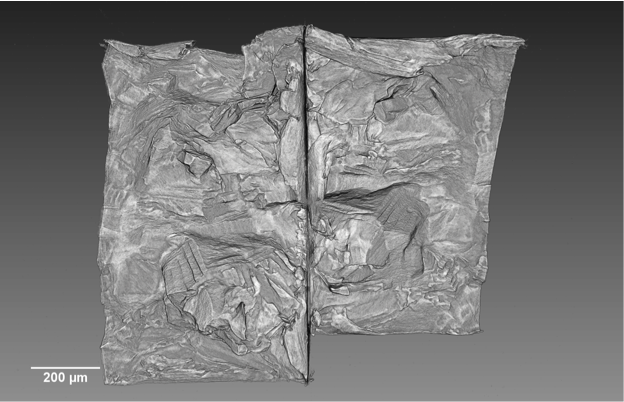

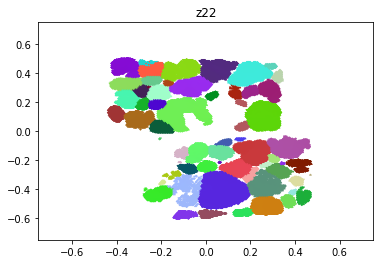

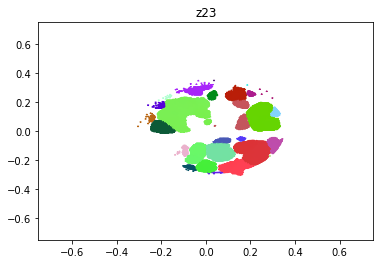

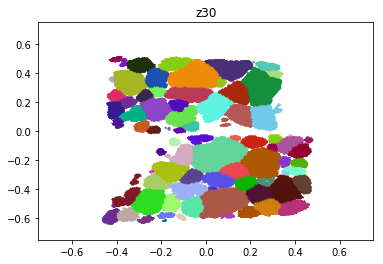

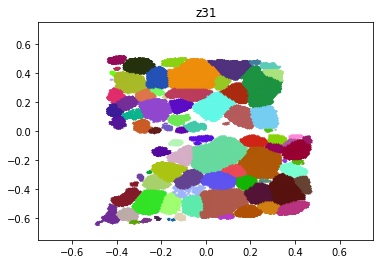

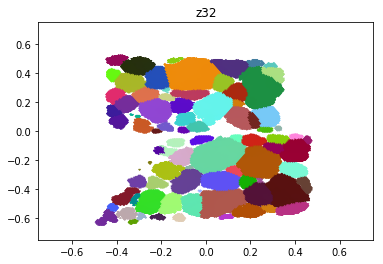

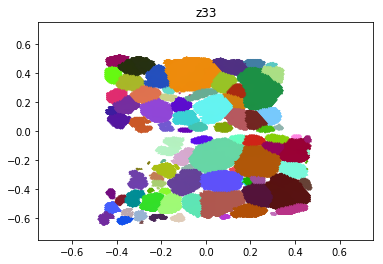

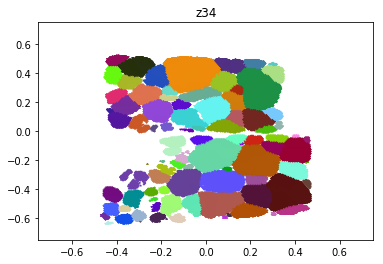

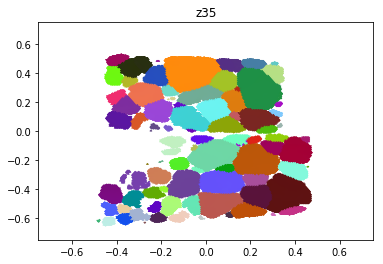

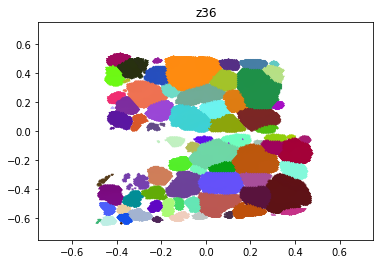

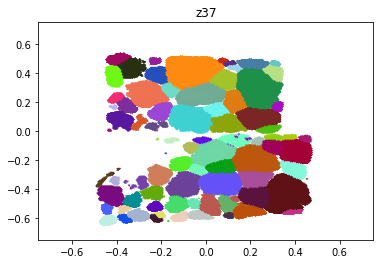

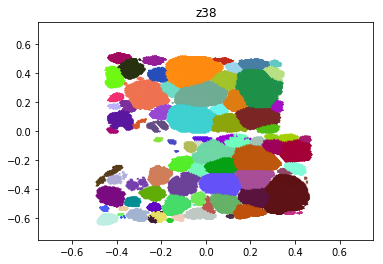

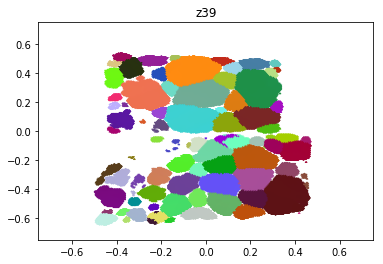

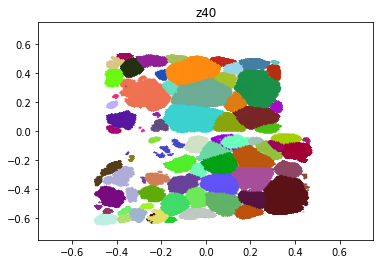

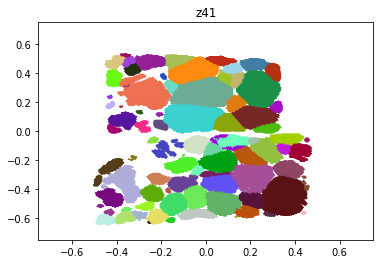

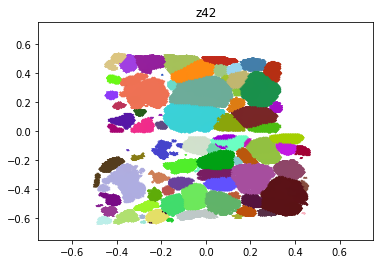

In [ ]:
import xdm_toolkit.xdm_plot as xplot
import xdm_toolkit.xdm_io as xdm_io
import matplotlib.pyplot as plt
reload(xplot)
plt.close('all')



num = [22, 23, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

for n in num:
    path = '/Users/sfli/Consult/Spear_2017/Reconstruction/Mg/Result/Mg_z{0}.mic.LBFS'.format(str(n))
    snp, sw = xdm_io.load_mic(path)
    fig, ax, im = xplot.plot_mic(snp, sw, 3, 0.4)
    plt.axis([-0.75, 0.75, -0.75, 0.75])
    plt.title('z{0}'.format(str(n)))
    plt.show(block=False)




RF-vector colors (where the same color indicates the same orientation) for the three selected layers, filterd by confidence. __*Each layer is 12$\mu m$ apart.*__ Note that orientation consistency is observed for some of the grains. Note that the RF-map is renormalized in each plot. This means the color may shift slightly between each of the layers.



Here confidences is set to 40% threshold, indicating at least 40% of all simulated diffraction overlap experimentally measured signals. In practice, 40% is often too low to differentiate twin related domains, so further refinement might be necessary.

[Oct 5] Note that z40 has consistent orientation and grain shape as z45 and z35, albeit small changes in the grain boundaries. This is expected given the size of the grains. It would be good (next step) to run the Kernal Averaged Misorientation code using MicAnalyasis. If we look at the orientation gradient across layers, we should see an incrase as we move up (to lower z layer number) towards the fracture surface.

Oct 5: Just started reconstructions on the following layers: 41, 42, 43, 39, 38, 37, 36.

In [23]:
54229 / 3600.0


15.063611111111111

In [ ]:
52119